### SKLEARN naive_bayes_GaussianNB

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

**X as features, Y as labels**

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

**Training**

In [3]:
clf = GaussianNB()

In [4]:
clf.fit(X, Y)

GaussianNB(priors=None)

**Predicting**

In [5]:
print clf.predict([[-0.8, -1]])

[1]


In [6]:
print clf.predict([[0.8, 1]])

[2]


### SKLEARN accuracy_score

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
test_points = [[1, 1], [2, 2], [3, 3], [4, 3]]
test_labels = [2, 2, 2, 1]

**Use last training example**

In [9]:
predicts = clf.predict(test_points)

In [10]:
predicts

array([2, 2, 2, 2])

In [11]:
count = len(["ok" for idx, label in enumerate(test_labels) if label == predicts[idx]])
print "Accuracy Rate, which is calculated manually is: %f" % (float(count) / len(test_labels))

Accuracy Rate, which is calculated manually is: 0.750000


In [12]:
accuracy_score(test_labels, predicts)

0.75

## Noisy Data, Complex Model

In [45]:
# In this exercise we'll examine a learner which has high variance, and tries to learn
# nonexistant patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.
# CODE YOU HAVE TO TYPE IN IS IN LINE 35

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# PLEASE NOTE:
# In sklearn 0.18, the import would be from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve, KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np

In [48]:
size = 150
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

In [49]:
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)

In [50]:
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

In [51]:

reg = DecisionTreeRegressor()
# Fit our model using X and y
reg.fit(X,y)
print "Regressor score: {:.4f}".format(reg.score(X,y))
    
# TODO: Use learning_curve imported above to create learning curves for both the
#       training data and testing data. You'll need reg, X, y, cv and score from above.
    
train_sizes, train_scores, test_scores = learning_curve(reg, X, y, cv=cv, train_sizes=size)
    
# Taking the mean of the test and training scores
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
    
# Plotting the training curves and the testing curves using train_scores_mean and test_scores_mean 
plt.plot(train_sizes ,train_scores_mean,'-o',color='b',label="train_scores_mean")
plt.plot(train_sizes,test_scores_mean ,'-o',color='r',label="test_scores_mean")
    
# Plot aesthetics
plt.ylim(-0.1, 1.1)
plt.ylabel("Curve Score")
plt.xlabel("Training Points")
plt.legend(bbox_to_anchor=(1.1, 1.1))

Regressor score: 1.0000


IndexError: tuple index out of range

# SVM

## Example

In [19]:
from sklearn import svm

In [20]:
x = [[0, 0], [1, 1]]
y = [0, 1]

In [21]:
clf = svm.SVC()
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
clf.predict([[2., 2.]])

array([1])

In [23]:
clf.support_vectors_

array([[ 0.,  0.],
       [ 1.,  1.]])

In [24]:
clf.support_

array([0, 1])

In [25]:
clf.n_support_

array([1, 1])

## Practice

In [26]:
print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

Automatically created module for IPython interactive environment


In [41]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(C=20.0, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

In [42]:
clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[2, 1, 2])

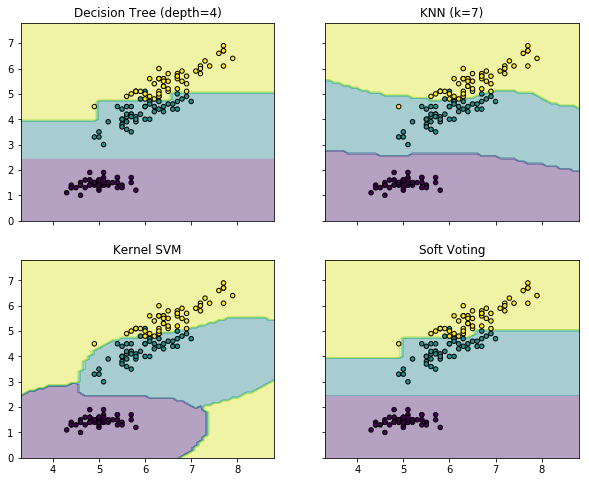

In [43]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

## Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

In [5]:
clf1 = DecisionTreeClassifier(min_samples_split=2)
clf2 = DecisionTreeClassifier(min_samples_split=50)

In [6]:
iris = load_iris()
cross_val_score(clf1, iris.data, iris.target, cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  0.93333333,  1.        ,  1.        ])

In [7]:
cross_val_score(clf2, iris.data, iris.target, cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.86666667,  1.        ,  1.        ,  1.        ])

# Entropy

$$
entropy=-\sum_{i}(P_i)log_2(P_i)
$$

In [1]:
import math

In [ ]:
def entropy(p):
    return -p * math.log(p, 2) - (1-p) * math.log((1-p), 2)

In [3]:
-0.5 * math.log(0.5, 2) + (-0.5 * math.log(0.5, 2))

1.0

In [17]:
(-0.33333 * math.log(0.33333, 2))-(0.66667 * math.log(0.66667, 2))

0.9182925006850888

In [19]:
1 - 0.75 * 0.9184

0.31120000000000003

# GridSearchCV

In [11]:
from sklearn import svm, datasets
from sklearn.model_selection import KFold, GridSearchCV

In [12]:
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()

In [13]:
clf = GridSearchCV(svr, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [15]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
clf.best_score_

0.97999999999999998

In [17]:
clf.cv_results_

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([ 0.00066662,  0.00066662,  0.0006667 ,  0.00066662]),
 'mean_score_time': array([ 0.00033339,  0.00033331,  0.00033331,  0.        ]),
 'mean_test_score': array([ 0.98      ,  0.97333333,  0.97333333,  0.98      ]),
 'mean_train_score': array([ 0.98999802,  0.98336304,  0.97999604,  0.97999604]),
 'param_C': masked_array(data = [1 1 10 10],
              mask = [False False False False],
        fill_value = ?),
 'param_kernel': masked_array(data = ['linear' 'rbf' 'linear' 'rbf'],
              mask = [False False False False],
        fill_value = ?),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'rank_test_score': array([1, 3, 3, 1]),
 'split0_test_score': array([ 1.        ,  0.98039216,  1.        ,  0.98039216]),
 'split0_train_score': array([ 0.97979798,  0.96969697,  0.95959596,  0.95959596]),
 'split1_test_score': array([ 0.96078431,  0.96078431,  0.92156863,  0.96

## example

In [18]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

%matplotlib inline

In [7]:
print(__doc__)

Automatically created module for IPython interactive environment


In [8]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [9]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [10]:
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [11]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Extracting the top 150 eigenfaces from 966 faces
done in 0.178s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.017s


In [12]:
# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 29.190s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [13]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Predicting people's names on the test set
done in 0.070s
                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.46      0.57        13
     Colin Powell       0.79      0.87      0.83        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.83      0.97      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.78      0.86        36

      avg / total       0.86      0.85      0.84       322

[[  6   2   0   5   0   0   0]
 [  1  52   1   6   0   0   0]
 [  1   3  17   6   0   0   0]
 [  0   4   0 142   0   0   0]
 [  0   1   0   3  20   0   1]
 [  0   3   0   3   1   8   0]
 [  0   1   1   6   0   0  28]]


In [14]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


In [15]:
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [16]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

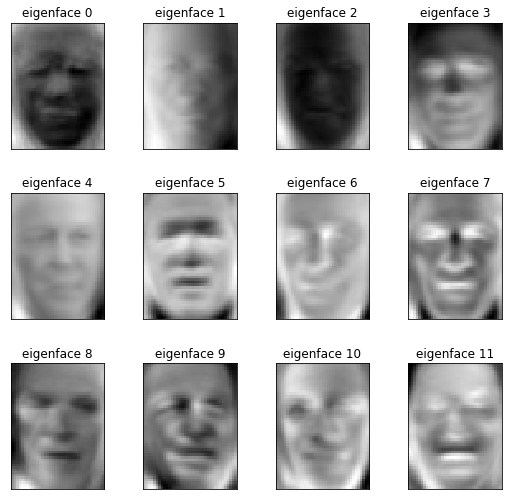

In [20]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

# 平均绝对误差

In [1]:
from sklearn.metrics import mean_absolute_error

In [2]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

In [3]:
mean_absolute_error(y_true, y_pred)

0.5

In [4]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]

In [5]:
mean_absolute_error(y_true, y_pred)

0.75

In [6]:
mean_absolute_error(y_true, y_pred, multioutput="raw_values")

array([ 0.5,  1. ])

In [7]:
mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.84999999999999998